In [81]:
import numpy as np
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['STHeiti']
mpl.rcParams['font.serif'] = ['STHeiti']
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['STHeiti', 'STHeiti']})
# Set Default Encoding
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

# 前言
第一部分练习了2017年的数据分析，这部分着重看一下每年基金收益排序的变化，是否存在稳定的高收益基金。
# 数据分析

In [2]:
# read the rate data of funds
rate = pd.read_csv('mixed_funds_rate.csv')
rate['date'] = pd.to_datetime(rate['date'])
rate.set_index('date',inplace=True)
rate.sort_index(ascending=True,inplace=True)

查看一下全年都有数据的基金每年有多少只。

In [3]:
years = np.arange(2002,2018)
for year in years:
    data = rate[str(year)]
    max_days_with_data = data.notnull().sum().max() - 50
    funds_nums_with_data = (data.notnull().sum() > max_days_with_data).sum()
    print year,funds_nums_with_data

2001 2609
2002 3
2003 14
2004 37
2005 77
2006 110
2007 177
2008 218
2009 273
2010 336
2011 395
2012 468
2013 534
2014 621
2015 767
2016 1372
2017 2077


准备从 2006 年开始查看每只基金每年排名，排名依据为收益。

In [4]:
rankings = pd.DataFrame(index=rate.columns)
years = np.arange(2006,2018)
for year in years:
    data = rate[str(year)]
    max_days_with_data = data.notnull().sum().max() - 50
    df = data[data.columns[data.notnull().sum() > max_days_with_data]]
    df.fillna(0,inplace=True)
    ranking = (df/100+1).cumprod().ix[-1].rank()
    rankings = pd.merge(rankings,ranking.to_frame(name=str(year)),how='outer',left_index=True,right_index=True)

In [10]:
rankings.dropna(how='all',inplace=True)

选出每年中排名在前1/10的次数较多的基金。

In [95]:
num = (rankings.lt(rankings.notnull().sum()/10,axis='columns').sum(axis=1)>=3).sum()
good = rankings.lt(rankings.notnull().sum()/10,axis='columns').sum(axis=1).order(ascending=False)[:num].index

去掉 2016、2017年排名200外的。

In [111]:
top200 = (rankings.ix[good]['2016'] <200) & (rankings.ix[good]['2017']<200)
good[top200]

Index([u'590002', u'290004', u'213003', u'161616', u'080015'], dtype='object')

In [112]:
rankings.ix[good[top200]]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
590002,NaN,NaN,3.0,217.0,12.0,18.0,54.0,112.0,534.0,492.0,92.0,41.0
290004,NaN,68.0,45.0,137.0,130.0,21.0,45.0,329.0,347.0,493.0,66.0,38.0
213003,NaN,21.0,96.0,143.0,10.0,227.0,280.0,70.0,611.0,588.0,120.0,84.0
161616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.0,11.0,498.0,114.0,57.0
080015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,297.0,5.0,96.0,78.0


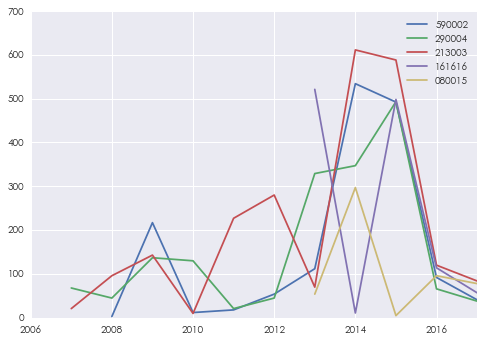

In [113]:
rankings.ix[good[top200]].T.plot()